In [1]:
import numpy as np, matplotlib.pyplot as plt

### Exercise 9.1 

写程序，或者修改例9.1，解例9.2中描述的泊松方程。选取单位使得$\varepsilon_0=1$, 连续迭代直到每个格点的电势变化小于$10^{-6}$V.

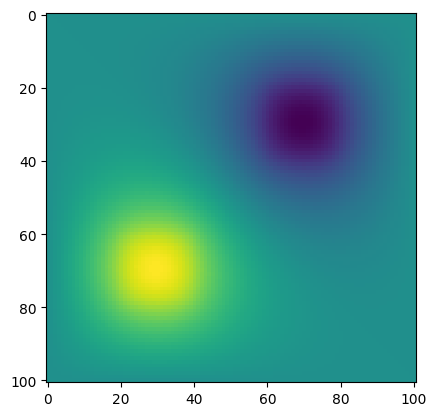

In [4]:
M = 100        #每边的格点数
V = 0.0        #上边界电压
target = 1e-6  #目标精度

#创建数组存电势值
phi = np.zeros((M+1,M+1), float)
phi[0,:] = V #边界条件
phiprime = np.copy(phi)

#主循环
delta = 1.0

rho = np.zeros((M+1,M+1),float)
rho[60:80,20:40] = 1
rho[20:40,60:80] = -1

while delta > target:
    phi[1:-1,1:-1] = 0.25*(phi[0:-2,1:-1]+phi[2:,1:-1]+phi[1:-1,:-2]+phi[1:-1,2:]
                            + rho[1:-1,1:-1])
                
    delta = np.max(np.abs(phi-phiprime))
    phiprime = np.copy(phi)
    
plt.imshow(phi)

### Exercise 9.2 

用高斯-塞德尔方法求解例9.1中的二维问题的拉普拉斯方程---一个边长为1m的正方形盒子, 在顶端的电压$V=1$伏, 其它三面电压为零. 用间距$a=1$cm的栅格, 实验每一面墙划分为100个栅格, 或者一共101个数据点. 连续迭代质点每个格点的电势在每一步迭代时的变化都不大于$\delta=10^{-6}$V，然后画解的强度图, 类似于图9.3. 实验不同的$\omega$, 找出能够使得求解速度最快的$\omega$值. 如前所述, 你应该发现0.9的效果比较好. 一般来说大一点的$\omega$值计算更快, 但是太大的值会使速度下降且超过1的值会导致不稳定.

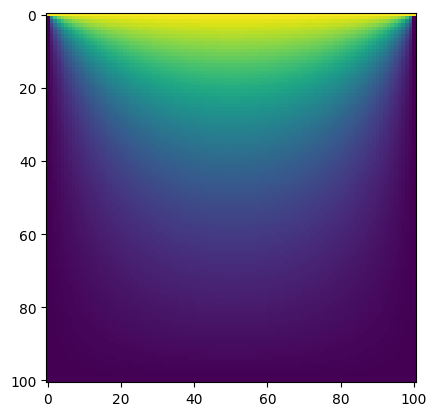

In [5]:
M = 100        #每边的格点数
V = 1.0        #上边界电压
target = 1e-6  #目标精度

#创建数组存电势值
phi = np.zeros((M+1,M+1), float)
phi[0,:] = V
phiprime = np.copy(phi)

#主循环
delta = 1.0

rho = np.zeros((M+1,M+1),float)
w = 0.9
while delta > target:
    for i in range(1,M):
        for j in range(1, M):
            phi[i,j] = (1+w)*0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])\
                       -w*phi[i,j]

    delta = np.max(np.abs(phi-phiprime))
    phiprime = np.copy(phi)
    
plt.imshow(phi)

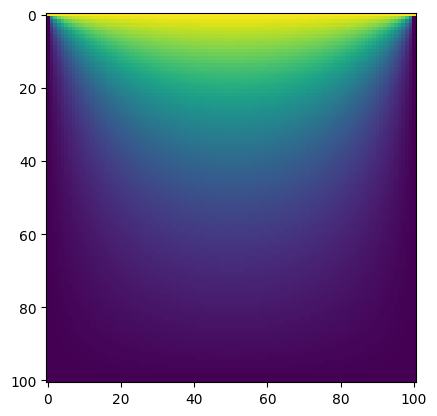

In [7]:
%timeit
M = 100        #每边的格点数
V = 1.0        #上边界电压
target = 1e-6  #目标精度

#创建数组存电势值
phi = np.zeros((M+1,M+1), float)
phi[0,:] = V
phiprime = np.copy(phi)

#主循环
delta = 1.0

w=0.2
while delta > target:
    phi[1:-1,1:-1] = 0.25*(phi[0:-2,1:-1]+phi[2:,1:-1]+phi[1:-1,:-2]+phi[1:-1,2:])
                
    delta = np.max(np.abs(phi-phiprime))
    phiprime = np.copy(phi)
    
plt.imshow(phi)

#### 注意
如果都考虑双循环的话，超松弛迭代确实是快一点，但是如果考虑到数组的矢量运算，矢量运算快。如果同时采用超松弛迭代和数组的矢量运算，会出现overflow的错误.

### Exercise 9.3 

考虑下面简单的电容器，由两个平的金属棒组成，放置在一共方形的金属箱中:

<img src="capacitor.png">

为了简化，我们对系统建立一个二维模型. 采用任何我们学过的方法，写程序计算箱子中$100\times100$格点的电势, 其中箱子的电压为0，两个板(厚度可忽略)的电压分别为$\pm1\,$V. 让你的重新计算每个格点的电势，精度达到$10^{-6}\,$volts，之后画强度图.

提示: 注意平行板的电压固定，所以这个问题与练习9.1的两个电荷情况不同. 实际上, 本题中的电容器是边界条件的一种: 它们的行为类似于箱子的壁，电势固定在某一个值保持不变.


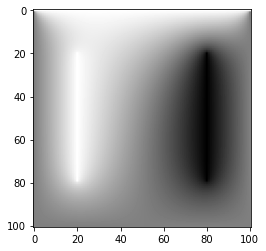

In [23]:
M = 100        #每边的格点数
V = 1.0        #上边界电压
target = 1e-6  #目标精度

#创建数组存电势值
phi = np.zeros((M+1,M+1), float)
phi[0,:] = V
phiprime = np.copy(phi)

#主循环
delta = 1.0

while delta > target:
    phi[1:-1,1:-1] = 0.25*(phi[0:-2,1:-1]+phi[2:,1:-1]+phi[1:-1,:-2]+phi[1:-1,2:]
                            + rho[1:-1,1:-1])
    phi[20:80,20]=1
    phi[20:80,80]=-1
    delta = np.max(np.abs(phi-phiprime))
    phiprime = np.copy(phi)
    
plt.imshow(phi)

### Exercise 9.4 
**地壳中的热扩散**
	
地壳中的热传导是经典的边界条件随时间变化的热传导问题，因为地表温度随季节变化.
假设地表某一点的日平均温度变化如下:
$$
	T_0(t) = A + B\sin {2\pi t\over\tau},
$$
这里$\tau=365\,$天, $A=10^\circ$C, $B=12^\circ$C.  在地表以下20米全年的温度可以近似为11$^\circ$C 
(高于地表的平均温度$10^\circ$C---由于地心的热量影响, 温度随着深度的增加而增加).  地壳的热扩散率因地而异, 为简化问题, 设热扩散率是常数 $a^2=D=0.1\,\mathrm{m}^2\,\mathrm{day}^{-1}$.
	
写程序计算地壳温度变化, 深度到20米, 时间上限是10年. 除了表面和离地表20米处的温度, 其它地方的初始温度均设为$10^\circ$C. 选择栅格点和时间步长$h$, 首先运行出9年的结果, 在第10年画出4个温度轮廓, 每个轮廓代表3个月的时间, 这四个轮廓在一幅图中, 显示温度随深度和时间的变化.

#### 解: 
热传导方程为
$$\frac{\partial \phi}{\partial t}=D\frac{\partial^2\phi}{\partial x^2},$$
其的差分格式为
    $$\phi(x,t+h)=\phi(x,t)+h\frac{D}{a^2}[\phi(x+a,t)+\phi(x-a,t)-2\phi(x,t)],$$
这里的$a$是空间的栅格点步长, $h$是时间格点步长, $D$是热扩散常数.

0.1


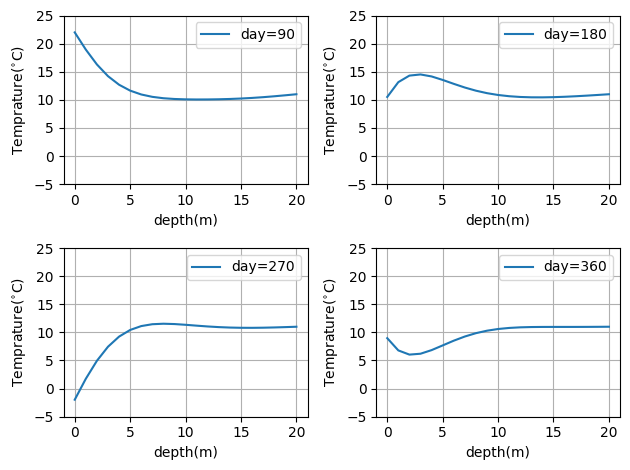

In [11]:
def T0(t,A=10,B=12,tau=365):
    return A+B*np.sin(2*np.pi*t/tau)

h = 1
a = 1
D = 0.1
r = h*D/a/a
print(r)
M = 21
N = 366
T = np.zeros((M,N),float)+10
T[-1,:] = 11 #摄氏度
for year in range(9): #for 前面9年
    for j in range(1, N-1):
        T[0,j] = T0(j)
        T[1:-1,j+1] = T[1:-1,j] + r*(T[2:,j]+T[:-2,j]-2*T[1:-1,j])
for j in range(1, N-1):
    T[0,j] = T0(j)
    T[1:-1,j+1] = T[1:-1,j] + r*(T[2:,j]+T[:-2,j]-2*T[1:-1,j])
    
x = np.arange(0,20+h,h)
for i,j in enumerate([90,180,270,360]):
    plt.subplot(2,2,i+1)
    plt.plot(x,T[:,j],label=f'day={j}')
    plt.grid()
    plt.ylim(-5,25)
    plt.legend()
    ax = plt.gca()
    ax.set(xlabel="depth(m)",ylabel="Temprature($^{\circ}$C)")
    plt.tight_layout()

### Exercise 9.5 

**波动方程的FTCS解**

考虑弦长度为$L$的钢琴，开始处于静止状态. 在$t=0$时刻, 弦被距离弦末端的琴锤击打:

<img src="piano.png">

琴弦在除了固定的末端$x=0$和$x=L$以外的地方会产生振动.

1. 写程序使用有限差分法解方程(9.28)描述的齐次一阶方程，取$v=100\,\mathrm{m~s}^{-1}$, 初始条件为$\phi(x)=0$, 初始速度$\psi(x)$不为零，其轮廓为
$$
\psi(x) = C {x(L-x)\over L^2} \exp \biggl[ -{(x-d)^2\over2\sigma^2} \biggr],
$$
其中$L=1\,$m, $d=10\,$cm, $C=1\,\mathrm{m~s}^{-1}$, $\sigma=0.3\,$m. 你需要选择一个合适的时间步长$h$. 一个合理的建议是取$h=10^{-6}\,$s.

#### 解:

$$u_{i,j+1}=c(u_{i+1,j}+u_{i-1,j})+2(1-c)*u_{i,j}-u_{i,j-1}$$
其中$c=a^2\frac{(\Delta t)^2}{(\Delta x)^2}$, 当$c<1$时稳定.

$j=1$时刻的波速变化为
$$u_{i,1}=\frac{c}{2}(u_{i+1,0}+u_{i-1,0})+(1-c)u_{i,0}+u_t(x,0)\Delta t.$$
其中$u_t(x,0)$是$t=0$时刻$u$对时间的一阶导数.

In [2]:
a = 100 #m/s
L = 1 #m
d = 0.1 #m
C = 1 #m/s
sigma = 0.3 #m
def u_t(x,C=1,d=0.1,sigma=0.3,L=1):
    return C*x*(L-x)/L/L*np.exp(-(x-d)**2/2/sigma**2)
dx = 0.01
dt = 5e-5
x = np.arange(0,L+dx,dx)
t = np.arange(0,0.1+dt,dt)
u = np.zeros((x.size,t.size),float)
c = (a*dt/dx)**2
print(c)
u[1:-1,1] = c/2*(u[2:,0]+u[:-2,0])+(1-c)*u[1:-1,0]+u_t(x[1:-1])*dt
for j in range(1,t.size-1):
    u[1:-1,j+1] = c*(u[2:,j]+u[:-2,j])+2*(1-c)*u[1:-1,j]-u[1:-1,j-1]

0.25


2. 做一个钢琴琴弦运动的动画.

In [3]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
plt.axis([0,1,u.min()*1.1,u.max()*1.1])
myline, = plt.plot([],[],'g-',lw=2)
def update(j):
    myline.set_data(x,u[:,j])
    return myline,
animation = FuncAnimation(fig,update,
                          frames = t.size, 
                          interval = 1)

### Exercise 9.6 

与方程(9.7)等价的三维方程是什么?

### 解:
三维拉普拉斯方程为
$$\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}+\frac{\partial^2\phi}{\partial z^2}=0$$

其中二阶导数的差分格式为
$$\frac{\partial^2\phi}{\partial x^2}=\frac{\phi(x+a,y,z)+\phi(x-a,y,z)-2\phi(x,y,z)}{a^2},$$
$$\frac{\partial^2\phi}{\partial y^2}=\frac{\phi(x,y+a,z)+\phi(x,y-a,z)-2\phi(x,y,z)}{a^2},$$
$$\frac{\partial^2\phi}{\partial z^2}=\frac{\phi(x,y,z+a)+\phi(x,y,z-a)-2\phi(x,y,z)}{a^2}$$
三维拉普拉斯方程的差分格式为
$$\phi(x+a,y,z)+\phi(x-a,y,z)+\phi(x,y+a,z)+\phi(x,y-a,z)+\phi(x,y,z+a)+\phi(x,y,z-a)-6\phi(x,y,z)=0.$$

### Exercise 9.7 

**常微分方程的松弛方法**

松弛法的应用范围不限于2个或更多独立变量的差分方程的解. 也可以被应用到一个独立变量的情况, 即常微分方程. 在这种情况下, 与偏微分方程一样, 它是一种解边值问题的技术, 边值问题是出现相对较少的一种常微分方程---我们在8.6节中讨论过.

考虑在390页例8.8中讨论的问题, 一个质量$m=1\,$kg被从高度$x=0$的位置抛入空中，10秒之后落回$x=0$的高度. 问题是计算球的轨迹, 但是我们不能用初值问题求解因为不知道球的初始速度. 一个求解方法是用8.6.1节讨论的打靶法. 另一个是松弛方法.

忽略摩擦效应, 轨迹是下面常微分方程的解:
$$
{d^2 x\over d t^2} = -g,
$$
其中$g$是重力加速度.

1. 用方程(5.109)中的差分替代二阶导数, 得到这个问题的松弛算法，可以在时间步长为$h$的格点上求解这个问题.

2. 引入边界条件$t=0$和$t=10$时$x=0$, 写程序用松弛法求解球的高度，时间格点为100个格点, 画$t=0$到$t=10$的轨迹. 运行松弛法直到答案在每一个格点的变化小于$10^{-6}$.

注意, 与打靶法不同, 松弛法不能给出速度的初值. 它只能给出解本身, 虽然也可以用$t=0$时刻的解的数值微分来求初始速度的近似值. 常微分方程的松弛法在我们对解本身感兴趣，而不关心获得这个解的初始条件感兴趣时很有用.

### 解:
由公式(5.109), 将自变量化为$t$：
$$f''(t)=\frac{f(t+h)-2f(t)+f(t-h)}{h^2},$$
代入常微分方程
$$
{d^2 f(t)\over d t^2} = -g,
$$
得到迭代公式:
$$f(t)=\frac{1}{2}h^2g+\frac{1}{2}[f(t+h)+f(t-h)].$$
边界条件: 当$t=0$和$t=10$时$x=0$

Text(0, 0.5, 'height(m)')

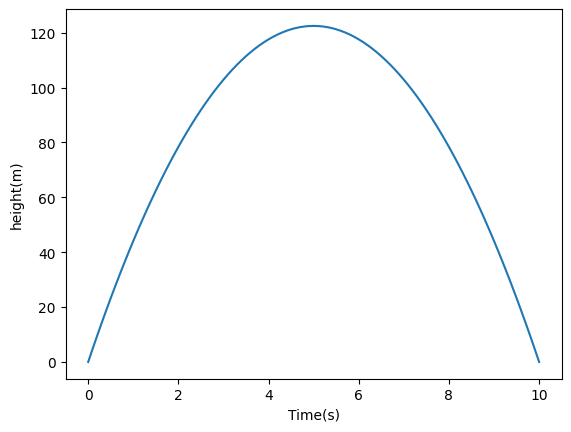

In [12]:
h = 10/100.
g = 9.8
t = np.arange(0,10+h,h)
x = np.zeros(t.size)
delta = 1.
xnew = np.copy(x)
while delta > 1e-6:
    x[1:-1] = 0.5*(h*h*g+x[2:]+x[:-2])
    delta = np.max(np.abs(xnew-x))
    xnew = np.copy(x)

plt.plot(t,x)
plt.xlabel('Time(s)')
plt.ylabel('height(m)')

### Exercise 9.8 

**薛定谔方程和Crank-Nicolson方法**

也许最重要的偏微分方程，至少对于物理学家来说，是薛定谔方程. 本练习用Crank-Nicolson方法解含时薛定谔方程，查看波函数随时间演化的图像. 后面的练习9.9，解同样的问题, 但使用的是谱方法.

我们查看一维薛定谔方程. 求解二维或三维薛定谔方程的方法的基本原理和一维相同, 但是需要花更长的时间计算, 所以从速度方面来讲, 我们求解一维方程. 没有势能的质量为$M$的粒子的一维薛定谔方程为
$$
-{\hbar^2\over2M} {\partial^2\psi\over\partial x^2}
  =  i \hbar {\partial\psi\over\partial t}.
$$
为简化, 我们将粒子放入一个墙壁无法穿透的盒子中, 所以我们可以在有限空间上求解方程. 盒子壁($x=0$和$x=L$)处的波函数$\psi$为0


用有限差分替换薛定谔方程中二阶导数, 应用欧拉方法, 我们得到向前差分方程
$$
\psi(x,t+h) = \psi(x,t) + h { i \hbar\over2ma^2} \bigl[ \psi(x+a,t)
              + \psi(x-a,t) - 2\psi(x,t) \bigr],
$$
其中$a$是空间格点的距离, $h$是时间步长. (注意不要将时间步长$h$与普朗克常数$\hbar$混淆.) 反向进行类似的操作，我们得到隐式公式
$$
\psi(x,t+h) - h { i \hbar\over2ma^2} \bigl[ \psi(x+a,t+h)
              + \psi(x-a,t+h) - 2\psi(x,t+h) \bigr] = \psi(x,t).
$$
取两者的平均值, 得到薛定谔方程的Crank--Nicolson方程:
\begin{align*}
\psi(x,t+h) - h { i \hbar\over4ma^2} \bigl[ &\psi(x+a,t+h)
              + \psi(x-a,t+h) - 2\psi(x,t+h) \bigr] \nonumber\\
  &= \psi(x,t) + h { i \hbar\over4ma^2} \bigl[ \psi(x+a,t)
              + \psi(x-a,t) - 2\psi(x,t) \bigr].
\end{align*}
这给出一组方程,每一个对应一个格点.


我们的问题的边界条件是在$x=0$和$x=L$处, $\psi=0$始终成立.
在这些点之间在 $a$, $2a$, $3a$, 等位置存在格点.  让我们把这些内部格点的$\psi$值表示成矢量
$$
\boldsymbol{\psi}(t)
  = \begin{pmatrix} \psi(a,t) \\ \psi(2a,t) \\ \psi(3a,t) \\ \vdots
    \end{pmatrix}.
$$
Crank--Nicolson方程可以表示为
$$
{A}\boldsymbol{\psi}(t+h) = {B}\boldsymbol{\psi}(t),
$$
其中矩阵${A}$和${B}$都是对称的三对角矩阵:
$$
{A} = \begin{pmatrix} a_1 & a_2 \\
                          a_2 & a_1 & a_2 \\
                              & a_2 & a_1 & a_2 \\
                              &     & a_2 & a_1 \\
                              &     &     &     & \ddots
          \end{pmatrix},\qquad\qquad
{B} = \begin{pmatrix} b_1 & b_2 \\
                          b_2 & b_1 & b_2 \\
                              & b_2 & b_1 & b_2 \\
                              &     & b_2 & b_1 \\
                              &     &     &     & \ddots
          \end{pmatrix},
$$
其中
$$
a_1 = 1 + h { i \hbar\over2ma^2},\qquad
a_2 = - h { i \hbar\over4ma^2},\qquad
b_1 = 1 - h { i \hbar\over2ma^2},\qquad
b_2 = h { i \hbar\over4ma^2}.
$$
(注意符号的不同以及分母中的系数2和4.)

方程 ${A}\boldsymbol{\psi}(t+h) = {B}\boldsymbol{\psi}(t)$
形如 ${A}\vec{x} = \vec{v}$，属于第6章我们学习的联立方程的问题, 可以用同样的方法求解.  特别的, 因为这里的矩阵${A}$是三对角矩阵, 我们可以用6.1.6节的高斯消元法的快速三对角版本. 

考虑一个电子(质量为 $M=9.109\times10^{-31}\,$kg) 处于一个边长为$L=10^{-8}\,$m的箱中. 假设$t=0$时刻, 电子的波函数有如下形式
$$
\psi(x,0) = \exp \biggl[ -{(x-x_0)^2\over2\sigma^2} \biggr]
             e^{ i \kappa x},
$$
其中
$$
x_0 = {L\over2},\qquad
\sigma = 1\times10^{-10}\,hrm{m},\qquad
\kappa = 5\times10^{10}\,hrm{m}^{-1},
$$
同时在$x=0$ 和 $x=L$处, $\psi=0$.  (这个$\psi(x,0)$的表达式没有归一化---应该整体乘上一个系数使得电子的概率密度函数积分为1. 但是忽略常数也没问题, 因为薛定谔方程式线性方程, 所以方程两边的常数相互抵消, 对解没有影响.)

1. 写程序对这个电子的Crank-Nicolson算法进行单步运算, 计算波函数值的矢量$\boldsymbol{\psi}(t)$, 假设初始波函数如前面给出的一样，用$N=1000$的空间格点,  $a=L/N$. 你的出现将要完成如下步骤. 首先, 给定$t=0$时刻的矢量$\boldsymbol{\psi}(0)$, 你需要用矩阵${B}$乘以这个矢量得到矢量$\vec{v} = {B}\boldsymbol{\psi}$. 因为${B}$是三对角矩阵, 这个计算比较简单. 矢量$\vec{v}$的第$i$个成分由下式给出
$$
v_i = b_1\psi_i + b_2(\psi_{i+1}+\psi_{i-1}).
$$
    你需要选择一个时间边长$h$. 一个合理的选择是取$h=10^{-18}\,$s.

    第二步你需要解关于$\vec{x}$的线性方程组${A}{x}=\vec{v}$，给出新的$\boldsymbol{\psi}$. 你可以用*numpy.linalg*中的函数*solve* 来解这个方程组, 但是因为矩阵${A}$是三对角矩阵, 一个更快的方法是采用附录E中给出的针对带状矩阵的求解方式, 它可以从文件*banded.py*导入 (可以从线上资源中找到).  注意，虽然粒子的波函数原则上是复数, 但本题中波函数始终是实数---上面方程的所有系数都是实数, 所以如果波函数开始是实数，就会一直保持为实数. 所以无需用复数组表示矢量$\boldsymbol{\psi}$. 实数组就够了 .

    第三，一旦你完成了单步运算的代码, 改进程序进行重复步长的计算，在一系列时间间隔$h$上求解波函数$\psi$. 注意矩阵${A}$不依赖于时间, 所以它不会随时间改变. 你只需要设置一次就可以反复使用. .

2. 改进程序，做出解的动画，展示每个时间节点上波函数的实数部分. 你可以使用 *visual*中的*rate*函数以保证动画的平滑度---查看117页3.5节.

   有很多做动画的方式. 一个简单的办法是每个格点放置一个小球，用小球的竖直位置代表波函数的实部. 较为复杂的方法是用*visual*包中的*curve*对象---详情参考在线文档www.vpython.org. 考虑到$x$的尺度，你可能需要对波函数乘以某一个常数以使它们的动画更明显. (如果你的$x$的单位是米, 那么波函数乘以一个约$10^{-9}$的因子会比较合适.)

3. 让你的动画运行一会，描述你看到的现象. 写几句话用物理语言描述系统正在发生的情况.

### Exercise 9.9 

**薛定谔方程和谱方法**

这个练习采用谱方法解与练习9.8相同的含时薛定谔方程

$$
-{\hbar^2\over2M} {\partial^2\psi\over\partial x^2}
  =  i \hbar {\partial\psi\over\partial t}
$$
一个位于长度为$L$的一维箱中的单个粒子，箱壁不可穿透. 波函数在箱壁处为0，所以一个可能的非归一化的解是
$$
\psi_k(x,t) = \sin \biggl( {\pi k x\over L} \biggr)\, e^{ i  Et/\hbar},
$$
其中$E$能量$E$可以通过代入薛定谔方程给出
$$
E = {\pi^2\hbar^2k^2\over2ML^2}.
$$
如9.3.4节的振动弦一样，我们能够以单个解的线性组合形式给出方程的完全解, 在格点$x_n=nL/N$ 的值为
$$
\psi(x_n,t) = {1\over N}
              \sum_{k=1}^{N-1} b_k \sin \biggl( {\pi k n\over N} \biggr)\>
              \exp \biggl(  i {\pi^2\hbar k^2\over2ML^2} t \biggr),
$$
其中$b_k$是能够确定波函数形式的系数的组合(可能是复数)，前面的因子
$1/N$是可选参数.

因为薛定谔方程(与波动方程不同)对时间是一阶导数, 我们只需一个初始条件来确定系数$b_k$，尽管由于系数一般是复数, 我们需要计算系数的实部和虚部.

如练习9.8，我们还考虑一个电子(质量
$M=9.109\times10^{-31}\,$kg)位于一个长度$L=10^{-8}\,$m的一维箱中. 在$t=0$时刻，电子的波函数形如
$$
\psi(x,0) = \exp \biggl[ -{(x-x_0)^2\over2\sigma^2} \biggr]
             e^{ i \kappa x},
$$
其中
$$
x_0 = {L\over2},\qquad
\sigma = 1\times10^{-10}\,\mathrm{m},\qquad
\kappa = 5\times10^{10}\,\mathrm{m}^{-1},
$$
且在箱壁$x=0$ 和 $x=L$处$\psi=0$.

1. 写程序计算$b_k$的值，为方便起见可以表示成实部和虚部，如$b_k=\alpha_k+ i \eta_k$. 将箱子分成$N=1000$个格点，创建两个数组分别包含波函数$\psi(x_n,0)$在每个格点上的实部和虚部. 对每个数组分别进行离散正弦变换，计算$\alpha_k$ 和 $\eta_k$的值, 其中$k=1\ldots N-1$.

为进行离散正弦变换, 你需要用到*dcst*包中的快速变换函数*dst*，你可以从在线文件*dcst.py*中找到相关函数. 相关包也可以从附录E中找到. 函数输入$N$个实数组成的数组，返回数组的离散正弦变换.

  (注意对正弦波变换来说，输入数组的第一个元素原则上应当为0，但是如果不是0，那么 *dst* 函数会简单的假设它是0. 类似的，返回数组的第一个元素永远是0, 因为正弦变换在$k=0$的时候的系数永远是0. 所以在效果上, 正弦变换实际上输入$N-1$个实数，将它们变换成另外$N-1$个实数. 因而，在某些正弦变换代码中，尽管不是这里提到的包*dsct*，每个数组的第一个元素都被忽略，因为它一直是零, 数组长度为$N-1$.)

1. 对上面的解 $b_k=\alpha_k+ i \eta_k$ 取实部得到
$$
Re \psi(x_n,t) = {1\over N} \sum_{k=1}^{N-1}
            \biggl[ \alpha_k \cos \biggl( {\pi^2\hbar k^2\over2ML^2} t \biggr)
            - \eta_k \sin \biggl( {\pi^2\hbar k^2\over2ML^2} t \biggr) \biggr]
            \sin \biggl( {\pi k n\over N} \biggr)
$$
    对波函数的实部. 

    这是一个逆正弦变换，系数等于方括号中的量. 扩展你的程序，用这个公式和离散逆正弦变换*idst*计算任意时刻$t$的波函数$\psi(x,t)$的实部画$t=10^{-16}\,$s时刻的波函数，检验你的程序. 

2. 进一步扩展你的程序画波函数随时间变化的动画，类似于练习9.8(b). 动画每一帧的时间间隔可以取为
  $10^{-18}\,$s.

3. 让你的动画运行一会，描述你所看到的. 写几句话用物理语言描述一下系统中正在进行的过程.
